# Neural Network

## NNs for hand-written digit (MNIST) classification

Start GPU. Should say "Found GPU ..."

In [1]:
import tensorflow as tf  
                      
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [20]:
import numpy as np  
np.random.seed(123)  
import tensorflow as tf  

from keras.models import Sequential, load_model, clone_model
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import Conv2D, MaxPooling2D  
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint 
from keras.datasets import mnist

from matplotlib import pyplot as plt

In [9]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape) 
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


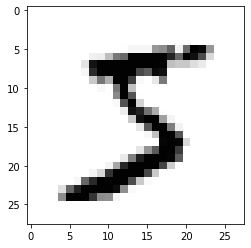

In [4]:
#Visualise training data
print(y_train[0]) 
plt.imshow(X_train[0], cmap = 'Greys') 

### Data pre-processing

In [10]:
# The image data isn't quite in the format that the Keras NN will want, so we want to change it:
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
print(X_train.shape)

(60000, 28, 28)
(60000, 784)


In [11]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
print(X_test.shape)

(10000, 784)


Normlaise pixel data to the range [0, 1] by dividing each pixel value by the max pixel value possible (255)

In [12]:
X_train = X_train.astype('float32')
X_train /= 255 

In [13]:
X_test = X_test.astype('float32')
X_test /= 255

In [14]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
print(y_train.shape)
Y_train = np_utils.to_categorical(y_train, 10)
print(Y_train.shape)

(60000,)
(60000, 10)


In [15]:
Y_test = np_utils.to_categorical(y_test, 10)

### Define the NN model

In [54]:
model = Sequential() 
model.add(Dense(500, input_dim=X_train.shape[1], activation="relu")) # takes the 784 length input vector and crushes it to 500

model.add(Dense(300, activation="relu")) 
model.add(Dense(200, activation="relu"))
model.add(Dense(50, activation="relu")) 
model.add(Dense(10, activation="relu")) 
model.add(Activation("softmax")) # converts the previous 10 length vector to a set of probabilities that sum to 1

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # loss function, optimiser and other metrics

print(model.summary()) # high-level overview of the model

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_31 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_32 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_33 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_34 (Dense)             (None, 10)                510       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 613,560
Trainable params: 613,560
Non-trainable params: 0
________________________________________________

In [55]:
model2= clone_model(model)
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
print(model2.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_31 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_32 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_33 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_34 (Dense)             (None, 10)                510       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 613,560
Trainable params: 613,560
Non-trainable params: 0
________________________________________________

### Train the NN model

#### Try: batch size of 32 images, 10 epochs

In [56]:
checkpointer = ModelCheckpoint('simple_NN-{epoch:02d}.hdf5', verbose = 1) # temporarily save the model after each epoch, with the epoch number 
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, callbacks=[checkpointer]) # Verbose = 1 to show the progress of the model training!

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4128 - accuracy: 0.4486

Epoch 00001: saving model to simple_NN-01.hdf5
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2391 - accuracy: 0.4819

Epoch 00002: saving model to simple_NN-02.hdf5
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2214 - accuracy: 0.4836

Epoch 00003: saving model to simple_NN-03.hdf5
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2045 - accuracy: 0.4885

Epoch 00004: saving model to simple_NN-04.hdf5
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1984 - accuracy: 0.4876

Epoch 00005: saving model to simple_NN-05.hdf5
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2000 - accuracy: 0.4861

Epoch 00006: saving model to simple_NN-06.hdf5
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1930 - accuracy: 0.488

model2: 49% accuracy in training set

#### Try: batch size of 128 images, 12 epochs

In [57]:
model2.fit(X_train, Y_train, validation_split= 0.3, batch_size=128, epochs=12, verbose=1)

Epoch 1/12
329/329 [==============================] - 2s 6ms/step - loss: 1.3107 - accuracy: 0.5015 - val_loss: 1.0438 - val_accuracy: 0.5693
Epoch 2/12
329/329 [==============================] - 2s 5ms/step - loss: 1.0121 - accuracy: 0.5797 - val_loss: 1.0288 - val_accuracy: 0.5724
Epoch 3/12
329/329 [==============================] - 2s 6ms/step - loss: 0.9994 - accuracy: 0.5781 - val_loss: 1.0189 - val_accuracy: 0.5793
Epoch 4/12
329/329 [==============================] - 2s 6ms/step - loss: 0.9831 - accuracy: 0.5824 - val_loss: 1.0235 - val_accuracy: 0.5747
Epoch 5/12
329/329 [==============================] - 2s 6ms/step - loss: 0.9773 - accuracy: 0.5821 - val_loss: 1.0088 - val_accuracy: 0.5773
Epoch 6/12
329/329 [==============================] - 2s 6ms/step - loss: 0.9580 - accuracy: 0.5885 - val_loss: 1.0145 - val_accuracy: 0.5777
Epoch 7/12
329/329 [==============================] - 2s 6ms/step - loss: 0.9562 - accuracy: 0.5888 - val_loss: 1.0068 - val_accuracy: 0.5778
Epoch 

model2: 58% accuracy in training set

### Test the NN model

In [58]:
score = model.evaluate(X_test, Y_test, verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 1.2251 - accuracy: 0.4878


In [59]:
score = model2.evaluate(X_test, Y_test, verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 1.0125 - accuracy: 0.5772


model2 has better accuracy (58%) than model (49%).